In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv(r'/content/drive/My Drive/Python/titanic/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [4]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('N', inplace = True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum())

데이터 세트 Null 값 개수 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [5]:
print('Sex 값 분포 : \n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 : \n', titanic_df['Cabin'].value_counts())
print('\n Emarked 값 분포 : \n', titanic_df['Embarked'].value_counts())

Sex 값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 : 
 N                  687
C23 C25 C27          4
B96 B98              4
G6                   4
F2                   3
F33                  3
C22 C26              3
E101                 3
D                    3
B57 B59 B63 B66      2
F G73                2
D17                  2
C2                   2
B58 B60              2
B77                  2
C65                  2
B28                  2
D26                  2
C126                 2
C78                  2
C124                 2
C52                  2
F4                   2
B51 B53 B55          2
C92                  2
D36                  2
C93                  2
D35                  2
E8                   2
B35                  2
                  ... 
D11                  1
E63                  1
D28                  1
B86                  1
C91                  1
B71                  1
D9                   1
A14                  1
D37                  

In [6]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [7]:
print('Sex값 분포 :\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 : \n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 : \n', titanic_df['Embarked'].value_counts())

Sex값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 : 
 N                  687
C23 C25 C27          4
B96 B98              4
G6                   4
F2                   3
F33                  3
C22 C26              3
E101                 3
D                    3
B57 B59 B63 B66      2
F G73                2
D17                  2
C2                   2
B58 B60              2
B77                  2
C65                  2
B28                  2
D26                  2
C126                 2
C78                  2
C124                 2
C52                  2
F4                   2
B51 B53 B55          2
C92                  2
D36                  2
C93                  2
D35                  2
E8                   2
B35                  2
                  ... 
D11                  1
E63                  1
D28                  1
B86                  1
C91                  1
B71                  1
D9                   1
A14                  1
D37                  1


In [8]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [9]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

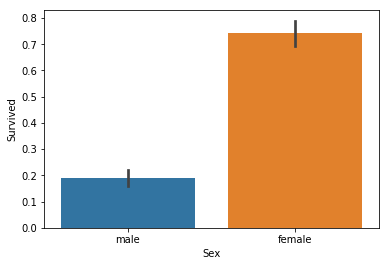

In [10]:
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)

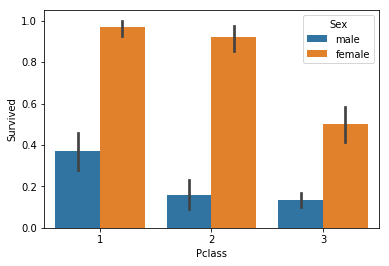

In [11]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

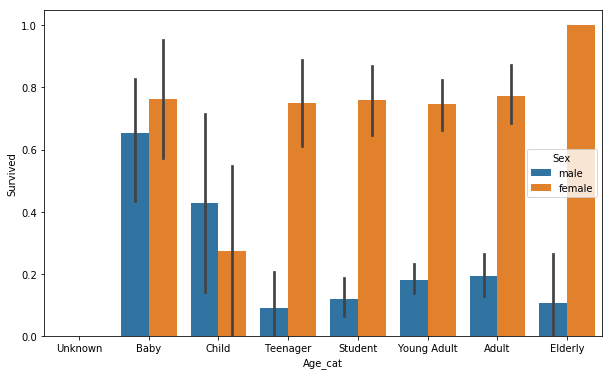

In [12]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용
def get_category(age):
  cat = ''
  if age <= -1 : cat = 'Unknown'
  elif age <= 5 : cat = 'Baby'
  elif age <= 12 : cat = 'Child'
  elif age <= 18 : cat = 'Teenager'
  elif age <= 25 : cat = 'Student'
  elif age <= 35 : cat = 'Young Adult'
  elif age <= 60 : cat = 'Adult'
  else : cat = 'Elderly'
  
  return cat

# 막대그래프 크기 figure를 더 크게 설정
plt.figure(figsize = (10, 6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category()함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, order = group_names)
titanic_df.drop('Age_cat', axis = 1 , inplace = True)

In [13]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])
    
  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [0]:


# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace = True)
  df['Cabin'].fillna('N', inplace = True)
  df['Embarked'].fillna('N', inplace = True)
  df['Fare'].fillna(0, inplace = True)
  
  return df

# 머신러닝 알고리즘에 불필요한 속성 제거 
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df



In [0]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv(r'/content/drive/My Drive/Python/titanic/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)

X_titanic_df = transform_features(X_titanic_df)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정 트리, RandomForest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 ; {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도 : 0.8324
LogisticRegression 정확도 ; 0.8659


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
import numpy as np
from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
  # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
  kfold = KFold(n_splits=folds)
  scores = []
  
  # KFold 교차 검증 수행.
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
    
    # Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))
    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print("평균 정확도 : {0:.4f}".format(mean_score))

# exec_kfold 호출
exec_kfold(dt_clf, folds = 5)

교차 검증 0 정확도 : 0.7542
평균 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
평균 정확도 : 0.7675
교차 검증 2 정확도 : 0.7865
평균 정확도 : 0.7739
교차 검증 3 정확도 : 0.7697
평균 정확도 : 0.7728
교차 검증 4 정확도 : 0.8202
평균 정확도 : 0.7823


In [18]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 10], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## 평가지표

왜 정확도만 믿으면 안 될까요?
편향에 빠질 수 있기 때문입니다.

예를 들어 ML 알고리즘을 적용한 뒤 예측 정확도의 결과가 보통 80%대였지만
탑승객이 남자인 경우보다 여자인 경우에 생존 확률이 높았기 때문에 별다른 알고리즘의 적용 없이 무조건 성별이 여자인 경우 생존으로, 남자인 경우 사망으로 예측 결과를 예측해도 이와 비슷한 수치가 나올 수 있습니다. 

다음의 코드를 직접 입력해보며 알아봅시다.

다음 예제에서는 사이킷런의 BaseEstimator 클래스를 상속받아 아무런 학습을 하지 않고, 성별에 따라 생존자를 예측하는 단순한 Classifier를 생성합니다. 사이킷런은 BaseEstimator를 상속받으면 Customized 형태의 Estimator를 개발자가 생성할 수 있습니다.

In [0]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  # fit() 메서드는 아무것도 학습하지 않음.
  def fit(self, X, y = None):
    pass
  
  # predict() 메서드는 단순히 sex 피처가 1이면 0, 그렇지 않으면 1로 예측함
  def predict(self, X):
    pred = np.zeros((X.shape[0], 1))
    for i in range(X.shape[0]):
      if X['Sex'].iloc[i] == 1:
        pred[i] = 0
      else :
        pred[i] = 1
        
    return pred

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('/content/drive/My Drive/ML/pymlguide/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는 : {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는 : 0.7877


이렇게 대충 Classifier를 만들었음에도 정확도가 78%까지 나오므로 
단순히 정확도만을 신뢰하기에는 무리가 있습니다. 

특히 정확도는 imbalanced 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가지표가 아닙니다. 

예를 들어, 100개의 데이터가 있다고 치고 20개가 0이고 80개가 1이라고 해봅시다. 그럼 그냥 1이라고만 대충 예측해도 정확도는 80퍼입니다. 머신러닝이 필요 없이 그냥 동전을 던지는게 나은 거죠.




## MNIST 데이터 세트 이용 이진분류 실습

MNIST는 머신러닝을 시작한 사람이라면 무조건 한 번 쯤은 들어보셨을겁니당.

이 MNIST 데이터를 불균형한 데이터 세트로 만들어 실습해보겠습니다.

사이킷런은 load_digits() API를 통해 MNIST 데이터 세트를 제공합니당.

원래 MNIST 데이터 세트는 레이블 값이 0부터 9까지 있는 멀티 레이블 분류를 위한 것입니다. 이것을 레이블 값이 3인 것만 True, 나머지 값은 모두 False로 변환해 이진 분류로 바꿔보겠습니다. 즉 10%만 True, 나머지 90%는 False인 불균형 데이터 세트로 변형하는 것임니다!

이러면 모든 데이터를 False, 즉 0이라고 예측하는 classifier를 이용해 정확도를 측정하면 약 90%에 가까운 예측 정확도를 얻을 수 있겠져? 이제 뭐시 중헌디!

![대체 텍스트](http://www.nbnnews.co.kr/news/photo/201702/94316_134576_1417.jpg)


예제 코드를 만들어봅시당!


In [0]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
  def fit(self, X, y):
    pass
  
  # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 변환
  def predict(self, X):
    return np.zeros((len(X), 1), dtype = bool)
  
# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 3이면 True이고 이를 astype(int)로 1로 변환, 3번이 아니면 False이고 0으로 변환
y = (digits.target == 3).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)  

#### 확인 ㄱㄱ?


In [22]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 데이터 세트 크기 : ', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(y_test.dtype)
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 데이터 세트 크기 :  (450,)
테스트 세트 레이블 0과 1의 분포도
int64
0    406
1     44
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.902


#### 이를 보면 아실 수 있겠져? 

#### 왜 불균형한 레이블 데이터 세트에서는 정확도를 성능 수치로 사용해서는 안되는지?


![대체 텍스트](http://mblogthumb3.phinf.naver.net/MjAxNjEwMjNfMTUz/MDAxNDc3MjI3MTQzODcw.HRb8raTYXi7WUIcvFuXFUIvACB4Cb5fKllFrR3JSLQMg.DCIIkGk7gr_uBIE3ytGgmfVIZuJzvQJ482XOtgJqlWkg.JPEG.retspe/%EC%B0%B8%EC%89%BD%EC%A3%A0.jpg?type=w800)

## 오차행렬

보시면 아시겠져?
오차행렬은 이진분류에서 성능지표로 잘 활용되는 지표입니다. 

쉽게 말해 예측 오류가 얼마인지 그리고 어떤 유형의 예측 오류가 발생하고 있는지 

모두 유형과 지수 모두를 확인할 수 있는 지표입니다.

x축에 Actual Class(실제 클래스)를 놓는지, Predicted Class(예측 클래스)를 놓는지는 다를 수 있습니다.

![대체 텍스트](https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png)

- TN은 예측값을 Negative 값 0으로 예측했고 실제 값 역시 Negative 값 0이라는 의미입니다.
- FP은 예측값을 Positive 값 1로 예측했는데 실제 값은 Negative 값 0이라는 의미입니다.
- FN은 예측값을 Negative 값 0으로 예측했는데 실제 값은 Positive 값 1이라는 의미입니다.
- TP은 예측값을 Positive 값 1로 예측했고 실제 값 역시 Positive 값 1이라는 의미입니다.

![대체 텍스트](https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg?w=748)


사이킷런은 오차행렬을 구하기 위해 confusion_matrix() API를 제공합니다.
이걸 이용해서 예제 코드를 한 번 지표로 만들어보겠습니다.

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[406,   0],
       [ 44,   0]])

TN은 array[0, 0]로 405, FP는 array[0, 1]로 0,

FN은 array[1, 0]로 45, TP는 array[1, 1]로 0에 해당합니다.

이 Confusion Matrix를 통해 Accuracy, Precision, Recall값을 알 수 있습니다.

Accuracy = (TN + TP)/(TN + FP + FN + TP)

Precision = TP / (FP + TP) = 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율

Recall = TP / (FP + TP) = 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율

## Accuracy vs Recall

Recall이 중요지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우입니다.(ex)암 판단 모델, 금융 사기 적발 모델 )

Precision이 중요한 경우 (ex)스팸메일)

## 엄훠나!!!
![대체 텍스트](https://t1.daumcdn.net/cfile/tistory/25279D405269E66428)

사이킷런은 precision_score()와 recall_score()를 API로 제공합니다.

하나하나 하는 건 귀찮으니까 get_clf_eval()함수를 만들겠습니당.

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('오차행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision, recall))

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('/content/drive/My Drive/Python/titanic/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Precision에 비해서 Recall이 좀 낮게 나왔네요. 어떻게 하면 Recall을 혹은 Precision을 강화시킬 수 있는걸까여?
![대체 텍스트](http://mblogthumb1.phinf.naver.net/20160322_80/shine_2me_1458626264892sdmIS_JPEG/%BF%A1%BA%F1%C3%F2%C2%A94_%2845%29.jpg?type=w2)

## Precision/Recall Tradeoff

Precision과 Recall은 상호 보완적인 평가지표입니다. 이 말은 무엇이냐

![대체 텍스트](https://pbs.twimg.com/profile_images/627783482979192832/_jnnHE63_400x400.jpg)

어느 한 쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다는 말이옵니다.

![대체 텍스트](http://mblogthumb3.phinf.naver.net/20160324_250/kubuki5_14588088503857zGag_JPEG/998f0c6e04ae3682e05fbb09e5d9d5d0.jpg?type=w800)

사이킷런의 분류 알고리즘은 예측 데이터가 특정 레이블(Label, 결정 클래스 값)에 속하는지를 계산하기 위해 먼저 개별 레이블별로 결정확률을 구합니다. 그리고 예측 확률이 큰 레이블값으로 예측하게 됩니다. 가령 이진 분류 모델에서 특정 데이터가 0이 될 확률은 20%, 1이 될 확률이 80%로 예측됐다면 최종 예측은 더 큰 확률을 가진, 즉 80%의 확률을 가진 1로 예측합니다.

일반적으로 이진 분류에서는 이 임곗값을 0.5, 즉 50%로 정하고 이 기준값보다 크면 Positive, 작으면 Negative로 결정합니다.

사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba()를 제공합니다.
predict_proba() 메서드는 학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능하며 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환합니다.

predict() 메서드와 유사하지만 단지 반환 결과가 예측 결과 클래스값이 아닌 예측 확률 결과입니다.

In [27]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결과값 array를 병합(concatenate)해 예측 확률과 결괏값을 한 눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis = 1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


In [28]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]
